In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML/YOLO

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML/YOLO


In [2]:
from model_keras import *
from utils import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [3]:
CLASSES = getClasses()
CLASSES

{0: 'prohibitory', 1: 'danger', 2: 'mandatory', 3: 'other'}

In [4]:
IMG_SIZE = 448
NB_CELL = 7
CELL_SIZE = IMG_SIZE/NB_CELL
NB_BOXES = 2
DEPTH = 3
NB_CLASSES = len(CLASSES)
ALPHA_COORD = 5
ALPHA_NOOBJ = 0.5

In [11]:
X, Y = prepareDataset()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=1)

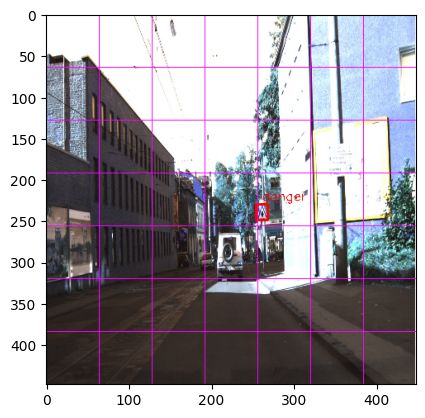

In [6]:
show_IMG_BOXES(X[0], Y[0], grid=True)

In [ ]:
# with metrics MAP
# BATCH_SIZE = 128
# EPOCHS = 100
# LearningRate = 1e-5
# data_size = len(Y)
# device_name = tf.test.gpu_device_name()

# model = YoloV1(img_size=IMG_SIZE, in_channels=DEPTH, nb_cells=NB_CELL, nb_boxes=NB_BOXES, nb_classes=NB_CLASSES)
# optim = tf.keras.optimizers.Adam(learning_rate=LearningRate)
# with tf.device(device_name):
#   for epoch in range(EPOCHS):
#       print(f"Epoch {epoch}")
#       map_epoch = []
#       loss_epoch = []
#       for i in tqdm(range(data_size//BATCH_SIZE)):
#           x_train = X_train[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE]
#           y_train = Y_train[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE]
#           with tf.GradientTape() as tape:
#               ypred = model(x_train, training = True)
#               ypred = tf.cast(ypred, y_train.dtype)
#               loss = loss_yolo(y_train, ypred)
#           grads = tape.gradient(loss, model.trainable_weights)
#           optim.apply_gradients(zip(grads, model.trainable_weights))
#           map_batch = MAP(y_train, ypred)
#           print(f"\tBATCH {i} - Loss {loss} - MAP {map_batch}")
#           map_epoch.append(map_batch)
#           loss_epoch.append(loss)
#       mean_map = sum(map_epoch)/len(map_epoch)
#       mean_loss = sum(loss_epoch)/len(loss_epoch)
#       print(f"Loss : {mean_loss} -- MAP : {mean_map}")

Epoch 0


  0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
device_name = tf.test.gpu_device_name()

BATCH_SIZE = 128
EPOCHS = 300
LearningRate = 2e-5
MOMENTUM = 0.9
DECAY = 0.001


## callbacks
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='max',
    save_best_only=True)




model = YoloV1(img_size=IMG_SIZE, in_channels=DEPTH, nb_cells=NB_CELL, nb_boxes=NB_BOXES, nb_classes=NB_CLASSES)
optim = tf.keras.optimizers.Adam(learning_rate=LearningRate, weight_decay=DECAY,clipnorm=1., ema_momentum=MOMENTUM)
model.compile(optimizer=optim, loss=loss_yolo)
with tf.device(device_name):
  model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(X_test, Y_test), callbacks=[model_checkpoint_callback], verbose=1)

Epoch 1/300
5/5 [==============================] - 61s 10s/step - loss: 3287.3013 - val_loss: 2542.1785
Epoch 2/300
5/5 [==============================] - 2s 398ms/step - loss: 1589.6050 - val_loss: 2451.6414
Epoch 3/300
5/5 [==============================] - 2s 399ms/step - loss: 1090.3251 - val_loss: 2341.6206
Epoch 4/300
5/5 [==============================] - 2s 398ms/step - loss: 927.7352 - val_loss: 2238.4199
Epoch 5/300
5/5 [==============================] - 2s 398ms/step - loss: 811.7539 - val_loss: 2151.1809
Epoch 6/300
5/5 [==============================] - 2s 398ms/step - loss: 743.7827 - val_loss: 2079.7295
Epoch 7/300
5/5 [==============================] - 2s 399ms/step - loss: 659.9644 - val_loss: 2017.6678
Epoch 8/300
5/5 [==============================] - 2s 398ms/step - loss: 639.5717 - val_loss: 1961.8260
Epoch 9/300
5/5 [==============================] - 2s 397ms/step - loss: 578.5087 - val_loss: 1902.1785
Epoch 10/300
5/5 [==============================] - 2s 398ms/s

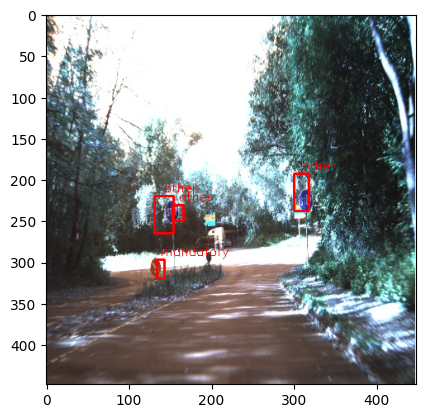

In [63]:
inx = 7
y_test = model(tf.expand_dims(X_train[inx], axis=0))
boxes = non_maximum_suppression(tf.squeeze(y_test, axis=0), confidance_threshold = 0.5)
show_IMG_BOXES(X_train[inx], tf.squeeze(y_test, axis=0), grid=False, from_pred=True)

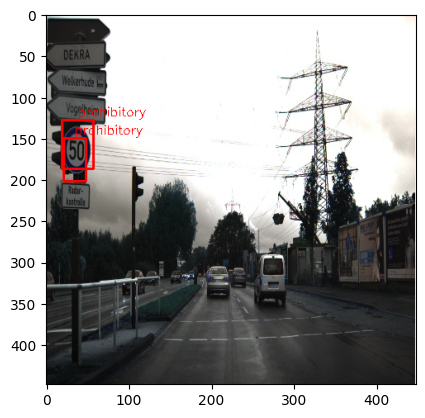

In [70]:
inx = 61
y_test = model(tf.expand_dims(X_train[inx], axis=0))
boxes = non_maximum_suppression(tf.squeeze(y_test, axis=0), confidance_threshold = 0.5)
show_IMG_BOXES(X_train[inx], tf.squeeze(y_test, axis=0), grid=False, from_pred=True)

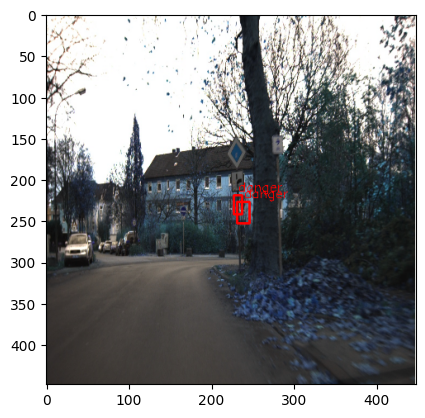

In [64]:
inx = 7
y_test = model(tf.expand_dims(X_test[inx], axis=0))
boxes = non_maximum_suppression(tf.squeeze(y_test, axis=0), confidance_threshold = 0.5)
show_IMG_BOXES(X_test[inx], tf.squeeze(y_test, axis=0), grid=False, from_pred=True)